**Description :** We will be using Linear Regression Model to advise a person who has come to visit our store for buying or selling the used cars. Our store is the top most company in the town offering marginal prices to the customers. During this covid situation, used car sales as there is a high demand of them due to their affordable prices. 

The value of a car drops right from the moment it is bought and the depreciation continues with each passing year. In fact, in the first year itself, the value of a car decreases by 20 percent of its initial value. The make and model of a car, total kilometers driven, overall condition of the vehicle and various other factors further affect the car’s resale value

**Problem Statement :** We need to advise a person who wishes to buy a used car by conveying the specifications needed by the customers like brand, mileage, year of purchase and some other features so that we can convey him the approximate price of the car.

### Importing the required libraries and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

We shall work with the used_cars_prices.csv file which is given by the company to analyse the data and make the model. It has the car details like Brand,  Body type, whether registration has done or not and engine type with the model name. It has also some numerical variables such as price of the car, mileage, engine volume, year of the model.

In [3]:
car_price = pd.read_csv('used_cars_prices.csv')
car_price.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Data Preprocessing

Summary of the dataset gives us an clear idea of the dataset about mean, median, standard deviation

In [4]:
#include all means it includes the categorical values also otherwise, only the numerical values will be displayes
car_price.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


**Insights from the Data :**
    
 - There are 4345 observations with 9 columns
 - Columns Price and and EngineV have some null values.
 - Some columns have outliers

### Dealing with the missing values

In [5]:
car_price.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

As there are large number of missing values in the dataset, we should not drop the outliers. We should replace them with other alternative ways such as Mean, median or by means of any other imputation.

#### Price - Missing values

In [6]:
print('Percent of missing "Price" records is %.2f%%' %((car_price['Price'].isnull().sum()/car_price.shape[0])*100))

Percent of missing "Price" records is 3.96%


~4% of entries for price of the car are missing. Let's see what the 'Price' variable looks like in general.

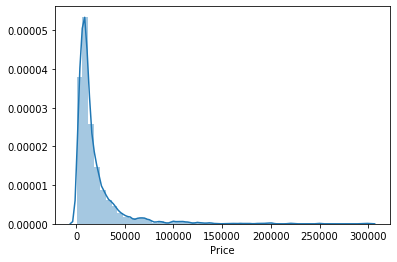

In [7]:
sns.distplot(car_price.Price)

Since "Price" is (right) skewed, using the mean might give us biased results by filling in prices that are higher than desired. To deal with this, we'll use the median to impute the missing values as the median has no effect on the outliers

In [8]:
#copying the entire data into a new dataframe
car_data = car_price.copy()

#Replacing the null values in the new dataset with the median of the original dataset
car_data['Price'].fillna(car_price['Price'].median(skipna = True), inplace = True)

#### EngineV - Missing Values

In [9]:
print('Percent of missing "EngineV" records is %.2f%%' %((car_price['EngineV'].isnull().sum()/car_price.shape[0])*100))

Percent of missing "EngineV" records is 3.45%


Surprislnly, ~3.5% of entries for engineV(Engine Volume) of the car are missing. Let's see what the 'engineV' variable looks like in general.

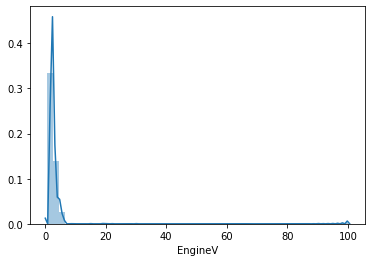

In [10]:
sns.distplot(car_price.EngineV)

Since "EngineV" is  also (right) skewed, using the mean might give us biased results by filling in prices that are higher than desired. To deal with this, we'll use the median to impute the missing values as the median has no effect on the outliers

In [11]:
#Replacing the null values in the new dataset with the median of the original dataset
car_data['EngineV'].fillna(car_price['EngineV'].median(skipna = True), inplace = True)

Now, let's check again whether there are any missing values in the adjusted dataset

In [12]:
car_data.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## Exploratory Data Analysis(EDA)

Let's explore the data carefully by visualization of the plots with all the features vs price as our ultimate goal is to find the price of the car for the features we consider

### Exploration of Brand(Categorical Variable)

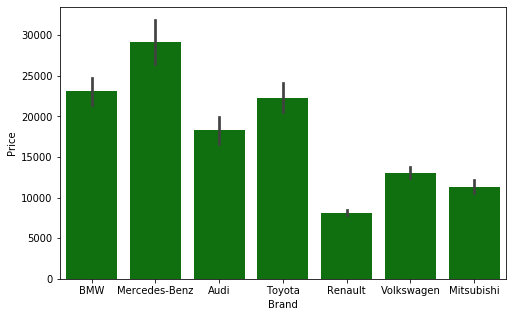

In [13]:
plt.figure(figsize = (8,5))
sns.barplot('Brand', 'Price', data = car_data, color = 'green')

From the plot,surprisingly,  we can see that **Mercedes-Benz** is the most sought brand used by the customers as it has so many comforts and amenities among high end cars which will be considered by only few customers

### Exploration of Engine Type

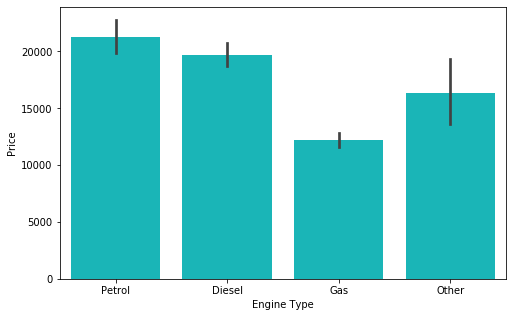

In [14]:
plt.figure(figsize = (8,5))
sns.barplot('Engine Type', 'Price', data = car_data, color = 'darkturquoise')

Obviously, we all know that petrol cars have high prices because they are the most sold out cars in the market as they need not to travel regularly. Where as in the case of diesel cars, we need to start once in two days so that there will be no trouble in engine

### Exploration of Body(Categorical Variable)

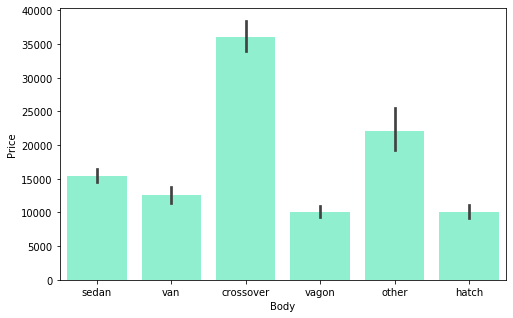

In [15]:
plt.figure(figsize = (8,5))
sns.barplot('Body', 'Price', data = car_data, color = 'aquamarine')

Unsurprisingly, we can see that most people prefer cross over body type as it is affordable at reasonable price for the middle class customers who are our main target in the growth of our sales

### Exploration of Mileage

We will be using scatter plot as we are comparing two numerical variables

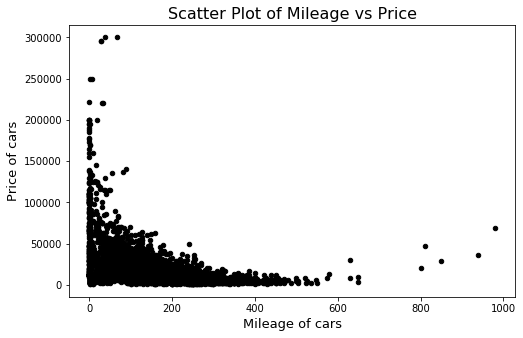

In [16]:
car_data.plot(kind = 'scatter', x = 'Mileage', y = 'Price', color = 'black',
             figsize = (8,5))

plt.xlabel('Mileage of cars', fontsize = 13)
plt.ylabel('Price of cars', fontsize = 13)
plt.title('Scatter Plot of Mileage vs Price', fontsize = 16)

plt.show()

We can see that most of the cars mileage is in the range of 0 to 200. Also, we can observe that only small amount of outliers exist in our data

### Exploration of EngineV

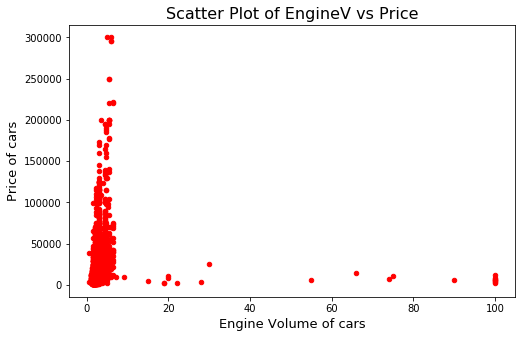

In [17]:
car_data.plot(kind = 'scatter', x = 'EngineV', y = 'Price', color = 'red',
             figsize = (8,5))

plt.xlabel('Engine Volume of cars', fontsize = 13)
plt.ylabel('Price of cars', fontsize = 13)
plt.title('Scatter Plot of EngineV vs Price', fontsize = 16)

plt.show()

We can see that most of the engine volume of the cars is in the range of 0 to ~5. Also, we can observe that only small amount of outliers exist in our data

### Exploration of Registration

We can see from the data, registration is only of two types: **Yes or No**. So, we shall see the countplot

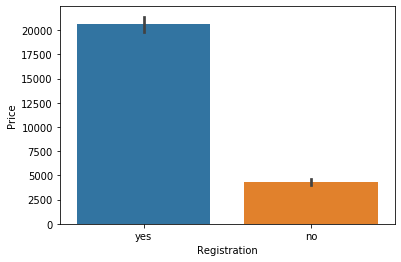

In [18]:
sns.barplot('Registration', 'Price', data = car_data)

Unsurprisingly, we can see that cars which are having no registration have less price as without registration of vehicles it may lead to several legal problems and shall be kept behind bars at some times. So, usually almost all the cars which are registered have low price and very less in number and occur in rare cases

### Exploration of year

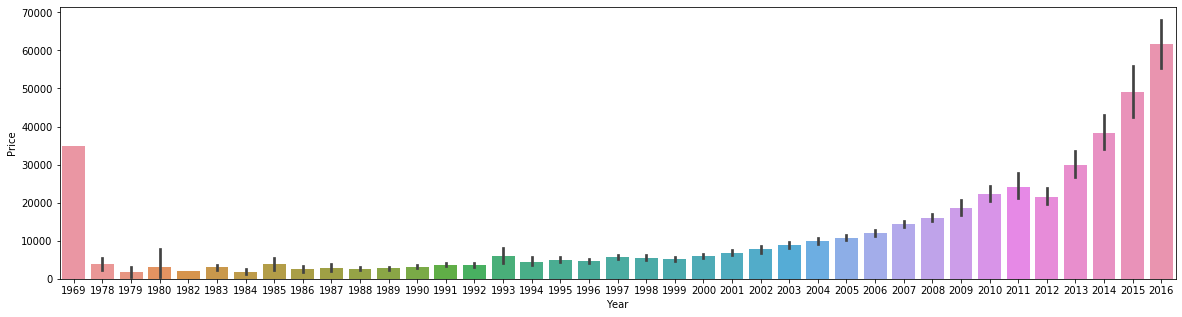

In [19]:
plt.figure(figsize = (20,5))
sns.barplot('Year', 'Price', data = car_data)

Obviously, car with the latest model year have more price as they have high features when compared to old ones and also latest year cars will also be less used, they have high price.

But surprisingly, 1969 model cars are having high prices. In reality, that model cars does not exist anymore. It might be during that period, they are in high price

### Dealing with the Outliers

This is a very important step of the process as outliers have the ability to influence the model in great manner. Also, for a good linear regression model, our data should be Normally Distributed and with outliers at any end, it will not be possible.

We will be using box plot to look for outliers. So, to deal with outliers, let us replace the outlier value using the IQR instead of dropping them.

##### Creating a user defined function for Calculation of IQR

In [20]:
def replace_outlier(col_name):
    sorted(col_name)
    Q1, Q3 = col_name.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

#### Checking the outliers of Mileage Variable

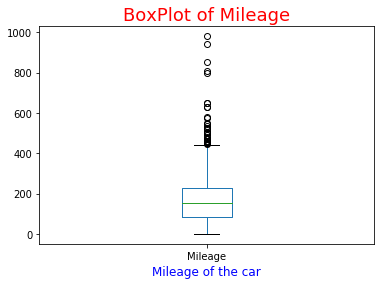

In [21]:
#Plotting the boxplot of the Mileage columns
car_data.boxplot(column = 'Mileage', grid = False)
#Setting the name of the x-axis
plt.xlabel('Mileage of the car', fontsize = 12, color = 'blue')
#Setting the title of the boxplot
plt.title('BoxPlot of Mileage', fontsize = 18, color = 'red')
plt.show()

From this plot, we can see that there are some outliers which may affect the accuracy of our model. 

Now, let's replace the outliers with the IQR values as defined above. If any outlier present is greater than the upper range, then it will be replaced by upper range value. Similar works with lower range

In [22]:
#Calling the function and declaring the upper range and lower range values
lowerrange, upperrange = replace_outlier(car_data['Mileage'])

#If any value in the mileage is greater than the upperrange, then it gets replaced by the upper range value
car_data['Mileage'] = np.where(car_data['Mileage'] > upperrange, upperrange, car_data['Mileage'])
#If any value in the mileage is less than the lowerrange, then it gets replaced by the lower range value
car_data['Mileage'] = np.where(car_data['Mileage'] < lowerrange, lowerrange, car_data['Mileage'])

Now, let's visualize if there are any outliers in our data using boxplot

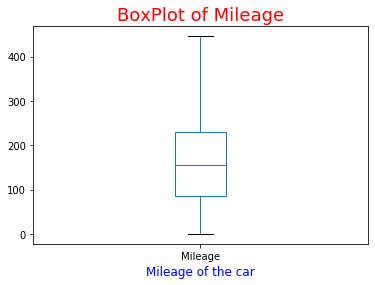

In [23]:
#Plotting the boxplot of the Mileage columns
car_data.boxplot(column = 'Mileage', grid = False)
#Setting the name of the x-axis
plt.xlabel('Mileage of the car', fontsize = 12, color = 'blue')
#Setting the title of the boxplot
plt.title('BoxPlot of Mileage', fontsize = 18, color = 'red')
plt.show()

Now, we can see that there are not outliers in the Mileage column as the outliers are replaced

#### Checking the outliers of EngineV Variable

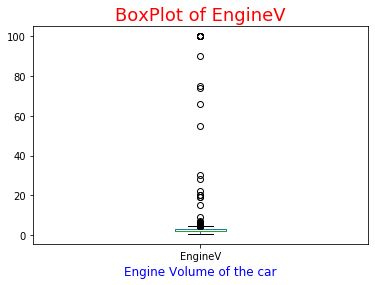

In [24]:
#Plotting the boxplot of the Mileage columns
car_data.boxplot(column = 'EngineV', grid = False)
#Setting the name of the x-axis
plt.xlabel('Engine Volume of the car', fontsize = 12, color = 'blue')
#Setting the title of the boxplot
plt.title('BoxPlot of EngineV', fontsize = 18, color = 'red')
plt.show()

From this plot, we can see that there are many outliers which may affect the accuracy of our model. Even dropping them affect our data badly and it is not a good measure 

So, let's replace the outliers with the IQR values as defined above. If any outlier present is greater than the upper range, then it will be replaced by upper range value. Similar works with lower range

In [25]:
#Calling the function and declaring the upper range and lower range values
lowerrange, upperrange = replace_outlier(car_data['EngineV'])

#If any value in the mileage is greater than the upperrange, then it gets replaced by the upper range value
car_data['EngineV'] = np.where(car_data['EngineV'] > upperrange, upperrange, car_data['EngineV'])
#If any value in the mileage is less than the lowerrange, then it gets replaced by the lower range value
car_data['EngineV'] = np.where(car_data['EngineV'] < lowerrange, lowerrange, car_data['EngineV'])

Now, let's visualize if there are any outliers in our data using boxplot

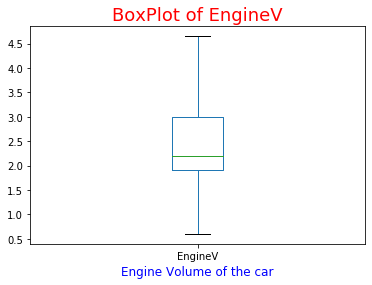

In [26]:
#Plotting the boxplot of the Mileage columns
car_data.boxplot(column = 'EngineV', grid = False)
#Setting the name of the x-axis
plt.xlabel('Engine Volume of the car', fontsize = 12, color = 'blue')
#Setting the title of the boxplot
plt.title('BoxPlot of EngineV', fontsize = 18, color = 'red')
plt.show()

Now, we can see that there are not outliers in the EngineV column as all the outliers are replaced

**Let us find the correlation between all the features using a heatmap**

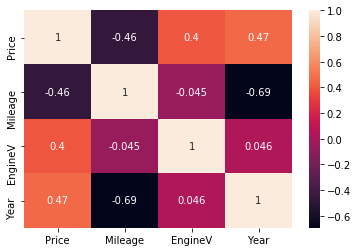

In [27]:
sns.heatmap(car_data.corr(), annot=True)

From the heatmap, we can clearly observe that there is a strong relationship between price and year

### Label Encoding

- Encoded Categorical Data for fitting the model
- Used Label Encoding as there are many categorical features which are Important and cannot be Ignored
- Did not use OneHotEncoding for 2 reasons
  - As there are many columns that we are considering and this makes the model more complex with more columns
  - And there are many categorical features to consider and cannot encode only specific features as we dont know their importance yet

The categorical data is label according to alphabetical order starting from 0

In [28]:
#Importing the required library
from sklearn.preprocessing import LabelEncoder
#LabelEncoder Function to Encode Categorical Data
LE = LabelEncoder()

#Encoding all the Categorical data
for i in car_data.columns:
    if car_data[i].dtype=='object':
        car_data[i]=LE.fit_transform(car_data[i])

car_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,1,4200.0,3,277.0,2.00,3,1,1991,18
1,2,7900.0,5,427.0,2.90,0,1,1999,266
2,2,13300.0,3,358.0,4.65,1,1,2003,237
3,0,23000.0,0,240.0,4.20,3,1,2007,224
4,5,18300.0,0,120.0,2.00,3,1,2011,227


**Encoding of Brand :** There are 7 unique values in Brand
  
  - 0 indicates Audi
  - 1 indicates BMW
  - 2 indicates Mercedes-BMW
  - 3 indicates Mitsubishi
  - 4 indicates Renault
  - 5 indicates Toyota
  - 6 indicates Volkswagen
  
**Encoding of Registration :** There are 2 unique values in Registration

  - 1 indicates Yes
  - 0 indicates No

**Encoding of Body :** There are 6 unique values in Body
  
  - 0 indicates Crossover
  - 1 indicates hatch
  - 2 indicates other
  - 3 indicates sedan
  - 4 indicates vagon
  - 5 indicates van
  
**Encoding of Engine Type :** There are 4 unique values in Engine Type

  - 0 indicates Diesel
  - 1 indicates Gas
  - 2 indicates Other
  - 3 indicates Petrol

We are dropping of the Model variable as there are many unique values and it is difficult to interpret them and it can reduce the efficiency of the model.

In [30]:
final_data = car_data.drop(['Model'], axis = 1)
final_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,1,4200.0,3,277.0,2.00,3,1,1991
1,2,7900.0,5,427.0,2.90,0,1,1999
2,2,13300.0,3,358.0,4.65,1,1,2003
3,0,23000.0,0,240.0,4.20,3,1,2007
4,5,18300.0,0,120.0,2.00,3,1,2011


Now, we can see that categorical variables are converted into numerical format. Hence, the number of columns have been increased.

### Checking the Assumtions of Linear Regression

we need to check some assumptions that need to be true before applying Linear Regression.

#### 1. Linearity

First up, we need to check whehter all of the features of our to be model are in linear relationship with the target or not.

Best way to do this is plotting a scatter chart of each feature with the target individually. We can use plt.scatter() for this purpose but to make it more presentable and comparable we will be plotting all scatters in same line and since 'price' is common for each scatter chart, we will make an equation in which it is shared by all other regressors.

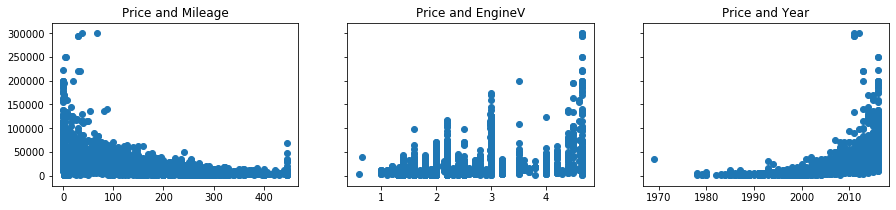

In [31]:
#sharey -> Controls sharing of properties among y axes:
#1, 3 -> No.of rows and columns
y, (x1, x2, x3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

#Plotting the scatter plot of Mileage vs Price
x1.scatter(final_data['Mileage'],final_data['Price'])
x1.set_title('Price and Mileage')

#Plotting the scatter plot of EngineV vs Price
x2.scatter(final_data['EngineV'],final_data['Price'])
x2.set_title('Price and EngineV')

#Plotting the scatter plot of Year vs Price
x3.scatter(final_data['Year'],final_data['Price'])
x3.set_title('Price and Year')

#To show the plots
plt.show()

Looking at these charts, we can say that none of the regressor seem to be in linear relationship with the target. To fix this problem we can transfer one of the variable in the charts. Since, price is common, let's transform it first. We will also be dropping column 'Price'. We will call new data frame linear_data and add log_price columns by removing price columns

##### Applying Log Transformation Feature Engineering Technique to get Linearity

In [32]:
final_data["LogPrice"] = np.log(final_data["Price"])
linear_data = final_data.drop(["Price"], axis = 1)
linear_data.head(3)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,LogPrice
0,1,3,277.0,2.00,3,1,1991,8.342840
1,2,5,427.0,2.90,0,1,1999,8.974618
2,2,3,358.0,4.65,1,1,2003,9.495519


Prices have been transformed. Let's plot scatter chart again with transformed prices.

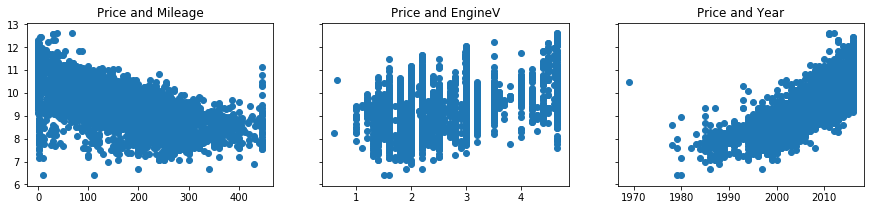

In [33]:
#sharey -> Controls sharing of properties among y axes:
#1, 3 -> No.of rows and columns
y, (x1, x2, x3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

#Plotting the scatter plot of Mileage vs Price
x1.scatter(linear_data['Mileage'],linear_data['LogPrice'])
x1.set_title('Price and Mileage')

#Plotting the scatter plot of EngineV vs Price
x2.scatter(linear_data['EngineV'],linear_data['LogPrice'])
x2.set_title('Price and EngineV')

#Plotting the scatter plot of Year vs Price
x3.scatter(linear_data['Year'],linear_data['LogPrice'])
x3.set_title('Price and Year')

#To show the plots
plt.show()

Now, we can see some linear relationship between target and regressors.

#### Multi-Collinearity

Multicollinearity can be detected via various methods. We will focus on VIF (Variable Inflation Factors). 

VIF measures the ratio between the variance for a given regression coefficient with only that variable in the model versus the variance for a given regression coefficient with all variables in the model.

We have a method for that in statsmodels, let's import the required module for that method.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

We will only be checking numerical variables as categorical variables do not have interdependencies among them.

First, we need to create a DataFrame of to-be checked variables and a DataFrame to insert VIF values in it.

In [35]:
variables = linear_data[["Mileage", "EngineV", "Year"]]
vif = pd.DataFrame()

#### Calculating VIF

In [36]:
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif = vif[["Features", "VIF"]]
vif

,Features,VIF
0,Mileage,3.463533
1,EngineV,8.738600
2,Year,11.537189


**Findings :** We have got VIF for each factor.

VIF may range from 1 to inf.

 - VIF starts at 1 and has no upper limit
 - VIF = 1, no correlation between the independent variable and the other variables
 - VIF exceeding 10 indicates high multicollinearity between this independent variable and the others

Year has VIF > 10. And it seem fair, mileage and year are interdependent. One way to fix this is dropping one, let's drop 'Year'. We will call it qualified data after dropping 'Year'.

In [37]:
qualified_data = linear_data.drop(['Year'], axis = 1)
qualified_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,LogPrice
0,1,3,277.0,2.00,3,1,8.342840
1,2,5,427.0,2.90,0,1,8.974618
2,2,3,358.0,4.65,1,1,9.495519
3,0,0,240.0,4.20,3,1,10.043249
4,5,0,120.0,2.00,3,1,9.814656
...,...,...,...,...,...,...,...
4340,2,3,9.0,3.00,0,1,11.736069
4341,1,3,1.0,3.50,3,1,8.779557
4342,1,3,194.0,2.00,3,1,8.987197
4343,5,3,31.0,2.20,3,1,9.560997


Now, we have data that is clean and complies with OLS assumptions. We did not check for Autocorrelation because it is often found in time series data and since we do not have time series data here, we won't worry about that. For now, we also assume that we have not left any important variable out, so we can say there is no endogeneity. Normality and Homoscadesticity is present in data, so fifth assumptions is also qualified.

### Feature Selection

Having too many irrelevant features in your data can decrease the accuracy of the models. Three benefits of performing feature selection before modeling your data are:

 - Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
 - Improves Accuracy: Less misleading data means modeling accuracy improves.
 - Reduces Training Time: Less data means that algorithms train faster.

#### Recursive Feature elimination(RFE)

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [38]:
#Importing the required libraries and packages
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#Declaring the predictor variables and target variable
x = qualified_data.drop('LogPrice', axis = 1)
y = qualified_data['LogPrice']

#Building a Logistic Regression model
model = LinearRegression()

#Creating a RFE model and selecting the attributes
rfe = RFE(model, 6) #6 indicates the number of attributes we have considered for building this model
rfe = rfe.fit(x, y)

#printing the selected features
print('The selected features are : %s' %list(x.columns[rfe.support_]))

The selected features are : ['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration']


We can see that all the features are selected and are important

### Declaring Predictor and Target Variables

The predictor variables(x) are nothing but the features which we will be using to predict the output and the target variable(y) means which we owe to predict.

In [42]:
y = qualified_data['LogPrice']
x = qualified_data.drop(['LogPrice'], axis = 1)

### Train and Test Split of the Data

To make sure that our model is not a underfitted or overfitted, we will test it with known targets. For this, we need to split the data into two groups one for train the model and one for testing it.

In [43]:
#Importing the required package for splitting the data
from sklearn.model_selection import train_test_split

#Defining the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Training the Model

Now, we are ready to train the model with the help of the training data

In [44]:
#Importing the required package
from sklearn.linear_model import LinearRegression

#Making an object of the Linear Regression
model = LinearRegression()

#Fitting the Model
model_fit = model.fit(x_train, y_train)

#Predicting the prices to compare
y_predict = model_fit.predict(x_test)

model_fit.score(x_test, y_test)

0.5856283626097842

We have trained the model and have made predictions for the same inputs as used for training to compare how close is our predicted prices to the actual prices.

From the above table, it is clearly stated that the **R2 score is ~59% means the model has an accuracy of the model has an accuracy of 59%.**

In [45]:
#Getting the coefficients of the linear regression model
model_fit.coef_

array([-0.04451718, -0.05727704, -0.00458446,  0.35439503, -0.0952495 ,
        1.013157  ])

In [46]:
#Importing the required package for calculating the R-Square value
import sklearn
from sklearn import metrics

#Calculating the mean absolute error percentage
(sklearn.metrics.mean_absolute_error(y_test, y_predict))*100

42.2718593139813

We can see that the Mean absolute error is 42%

In [47]:
#Calculating the adjusted r2 score
sklearn.metrics.r2_score(y_test, y_predict)

0.5856283626097842

We can see that the value of adjuted r2 is nearly 58.5%

In [48]:
#Calculating the mean square error
sklearn.metrics.mean_squared_error(y_test, y_predict)

0.3368386836864456

Let's plot a scatter plot of Actual and Predicted Prices to compare. More observations close to a 45 degree line, better the model.

[Text(0, 0.5, 'Predicted Prices'), Text(0.5, 0, 'Actual Prices')]

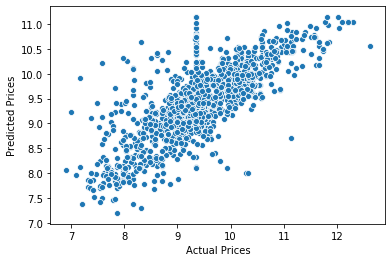

In [49]:
fig = sns.scatterplot(y_test, y_predict)
fig.set(xlabel = 'Actual Prices', ylabel = 'Predicted Prices')

Seems like a good model, doesn't it?

Another way to check how good the model is to plot a **Probability Distribution Function of Residuals. (Residual = Observation - Prediction)**

Text(0.5, 1.0, 'Residual Plot')

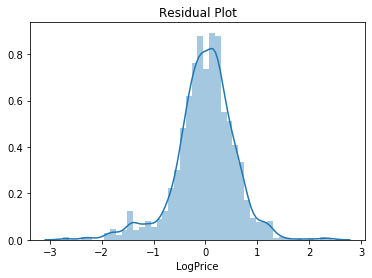

In [50]:
residuals = y_test - y_predict
sns.distplot(residuals).set_title('Residual Plot')

For the best case scenario, the residuals should be normally distributed. This graph is mostly okay. But, at the same time it has more residuals on the negative side of the graph. It suggests that our model has overestimated price more often than the time it has underestimated.

#### Building a Model for Checking Feature Importance

In [51]:
#Importing the required packages
from sklearn.preprocessing import StandardScaler

#Considering all the feautures
y = qualified_data['LogPrice']
X = qualified_data.drop(['LogPrice'], axis = 1)

#Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#StandardScaler Function to scale the X's features
sc_X = StandardScaler()

#Scaling on X
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()

#StandardScaler Function to scale the Y
y_train = sc_y.fit_transform(np.asarray(y_train).reshape(-1,1))
y_test = sc_y.fit_transform(np.asarray(y_test).reshape(-1,1))

#Fitting model on scaled data
reg = LinearRegression().fit(X_train,y_train)

#Getting the Coefficients to Get the feature Importance
reg.coef_

array([[-0.08709434, -0.09494341, -0.50263079,  0.33542893, -0.14240494,
         0.31957532]])

In [52]:
#Assigning the values to a dictionary, converting to a datafram and Sorting by coefficient values
d = {'Col':qualified_data.drop('LogPrice',axis=1).columns,'Coef':np.abs(reg.coef_[0])}

#Converting into a dataframe
d = pd.DataFrame(d)
#Sorting by coefficient values
d = d.sort_values(by='Coef',ascending=False)

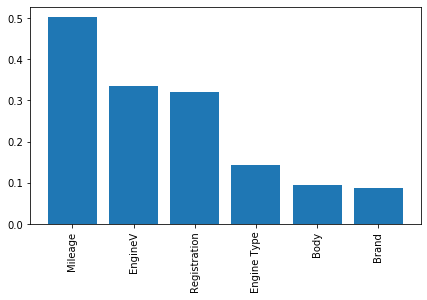

In [55]:
#Plotting the Results
figure = plt.figure(figsize=(7,4))
plt.bar(d['Col'],d['Coef'])
plt.xticks(rotation='vertical')
plt.show()

##### Now let us consider  the important features by looking from the above plot

In [58]:
#Importing the required package
import statsmodels.api as sm
#Considering only the Important Variables
X=qualified_data[['Mileage', 'EngineV', 'Engine Type', 'Registration']]
y=qualified_data['LogPrice']

#Using OLS
X = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
regS = sm.OLS(y,X)
rs = regS.fit()

#Model summary
rs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1608.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        06:59:54   Log-Likelihood:                -3797.6
No. Observations:                4345   AIC:                             7605.
Df Residuals:                    4340   BIC:                             7637.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.3593      0.044    190.303      0.000       8.273       8.445
Mileage         -0.0046   9.02e-05    -51.506      0.000      -0.005      -0.004
EngineV          0.4095      0.010     40.933      0.000       0.390       0.429
Engine Type     -0.0829      0.007    -12.538      0.000      -0.096      -0.070
Registration     0.9788      0.032     31.054      0.000       0.917       1.041
==============================================================================
Omnibus:                      427.696   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.763
Skew:                          -0.572   Prob(JB):                    6.85e-234
Kurtosis:                       5.150   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the values of R2 and adjusted R2 has increased some what to 60% when we removed the features Brand and Body

In [59]:
#Prediction on Test data
y_pred = rs.predict(X_test)

In [60]:
#Calculating the mean absolute error percentage
(sklearn.metrics.mean_absolute_error(y_test, y_pred))*100

42.98037148912633

In [61]:
#Calculating the mean square error
sklearn.metrics.mean_squared_error(y_test, y_pred)

0.34422926559679223

We can see that there is an increase in the error percentages.. So, we need to consider all the features in the dataset excluding the variable Model.

[Text(0, 0.5, 'Predicted Prices'), Text(0.5, 0, 'Actual Prices')]

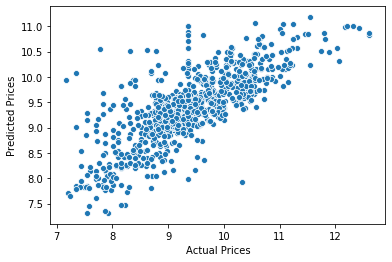

In [62]:
fig = sns.scatterplot(y_test, y_pred)
fig.set(xlabel = 'Actual Prices', ylabel = 'Predicted Prices')

Seems like a good model, doesn't it?

Another way to check how good the model is to plot a **Probability Distribution Function of Residuals. (Residual = Observation - Prediction)**

Text(0.5, 1.0, 'Residual Plot')

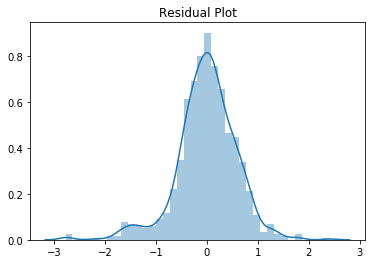

In [63]:
residuals = y_test - y_pred
sns.distplot(residuals).set_title('Residual Plot')

For the best case scenario, the residuals should be normally distributed. This graph is mostly okay. But, at the same time it has somewhat more residuals on the negative side of the graph. It suggests that our model has overestimated price more often than the time it has underestimated.

Hence, by seeing all the above considerations, we come to know that we can consider some of the features for the model. 

But using Linear Regression shows that the accuracy level is some what low which is 60%. But with the use of Gradient Boosting, Random Forest algorithms which are advance to Linear Regression model, we can increase the accuracy of the model in a great range.

Thus to predict the car prices with this data, Linear regression is not the correct model to predict the priceswith more accuracy